1. Агрегация по визитам
 
 Создай функцию aggregate_client_daily_items(df), которая:
 1. Группирует транзакции по (client, tr_date, item, item_group)
 2. Суммирует quantity и amount для каждой группы（Только когда четыре столбца данных этой строки — client, tr_date, item, item_group — совпадают, их количество и сумма будут суммированы и объединены в одну строку (для удовлетворяющих условию строк суммируются quantity и amount, чтобы получить данные, объединенные в одну строку).）
 3. Возвращает DataFrame с колонками: client, visit_date, item, item_group, quantity, amount
 4. Отсортирован по client, visit_date, item
 Комментарий: bcode (номер чека) игнорируем — нас интересует, что клиент купил в день, а не структура чеков.
 5.Вывести общее количество данных.


 

In [7]:
import pandas as pd

def aggregate_client_daily_items(df):
    """
    Агрегирует транзакции в визиты по клиенту и дню.
    
    Группировка: по (client, tr_date, item, item_group)
    - Суммирует quantity и amount для совпадающих строк
    - Возвращает: client, visit_date, item, item_group, quantity, amount
    - Сортировка: client, visit_date, item
    """
    
    # --- 1. Проверка размера исходных данных ---
    print(f"📊 ИСХОДНЫЕ ДАННЫЕ: {len(df)} строк")
    
    # --- 2. Проверка колонок ---
    required_cols = ['client', 'tr_date', 'item', 'quantity', 'amount']
    missing = [col for col in required_cols if col not in df.columns]
    if missing:
        raise KeyError(f"❌ Отсутствуют колонки: {missing}")
    
    # --- 3. Работа с копией данных ---
    df = df.copy()
    
    # Обработка отсутствующей колонки item_group
    if 'item_group' not in df.columns:
        print("🔧 Колонка 'item_group' отсутствует. Создаём заглушку: 'Unknown'")
        df['item_group'] = 'Unknown'
    
    # --- 4. Преобразование даты ---
    print("🔍 Анализ формата tr_date...")
    
    # Попытка конвертации в datetime
    # 'coerce' превратит нераспознанные даты в NaT (пустое значение)
    # dayfirst=True полезно для форматов типа DD.MM.YYYY
    df['temp_date'] = pd.to_datetime(df['tr_date'], errors='coerce', dayfirst=True)
    
    # Проверка на невалидные даты
    invalid_count = df['temp_date'].isna().sum()
    print(f"📊 Успешно распознано дат: {len(df) - invalid_count}")
    
    if invalid_count > 0:
        print(f"✂️ Удаляем {invalid_count} строк с некорректной датой")
        df = df.dropna(subset=['temp_date'])
        
    # Извлекаем только дату (YYYY-MM-DD) для корректной группировки
    df['visit_date'] = df['temp_date'].dt.date
    
    # --- 5. Очистка пустых значений ---
    before_group = len(df)
    df = df.dropna(subset=['client', 'item', 'visit_date']).copy()
    after_group = len(df)
    if before_group != after_group:
        print(f"✂️ Удалено строк с пустыми client/item/датой: {before_group - after_group}")
    
    # --- 6. Группировка ---
    # Логика: объединяем строки, только если client, visit_date, item И item_group совпадают
    print("🔄 Выполняем группировку по (client, visit_date, item, item_group)...")
    
    aggregated = (
        df.groupby(['client', 'visit_date', 'item', 'item_group'], as_index=False)
        .agg({
            'quantity': 'sum',
            'amount': 'sum'
        })
        .round(2)
    )
    
    print(f"✅ Агрегировано: {len(aggregated)} строк (после объединения)")
    
    # --- 7. Сортировка ---
    result = aggregated.sort_values(['client', 'visit_date', 'item']).reset_index(drop=True)
    
    # --- 8. Финальный результат ---
    print(f"\n🎯 ФИНАЛЬНЫЙ РЕЗУЛЬТАТ: {len(result)} строк")
    
    return result[['client', 'visit_date', 'item', 'item_group', 'quantity', 'amount']]

# ==========================================
# БЛОК ВЫПОЛНЕНИЯ (То, чего не хватало)
# ==========================================

# 1. Загрузка данных
try:
    print("📂 Загрузка файла...")
    # Убедитесь, что файл находится в той же папке
    df_source = pd.read_csv('transactions_diy.csv') 
    
    # 2. Вызов функции и сохранение результата в переменную
    df_daily_items = aggregate_client_daily_items(df_source)

    # 3. Вывод результатов
    print("-" * 30)
    print(f"✅ Переменная с результатом создана: {len(df_daily_items)} строк")
    print(df_daily_items.head(10))
    
except FileNotFoundError:
    print("❌ Ошибка: Файл 'transactions_diy.csv' не найден. Пожалуйста, загрузите его.")
except Exception as e:
    print(f"❌ Произошла ошибка: {e}")

📂 Загрузка файла...
📊 ИСХОДНЫЕ ДАННЫЕ: 1008688 строк
🔍 Анализ формата tr_date...
📊 Успешно распознано дат: 1008688
🔄 Выполняем группировку по (client, visit_date, item, item_group)...
✅ Агрегировано: 1003083 строк (после объединения)

🎯 ФИНАЛЬНЫЙ РЕЗУЛЬТАТ: 1003083 строк
------------------------------
✅ Переменная с результатом создана: 1003083 строк
      client  visit_date      item                    item_group  quantity  \
0    client1  2018-01-22  sku10765                 Лаки и краски         1   
1    client1  2018-01-22  sku13695                 Стойматериалы         5   
2    client1  2018-01-22  sku29083                 Лаки и краски         2   
3    client1  2018-01-22   sku2954                 Лаки и краски         1   
4   client10  2019-08-05   sku1893                   Инструменты         1   
5   client10  2019-08-05   sku5624                   Инструменты         1   
6   client10  2019-08-05   sku7053                   Инструменты         1   
7  client100  2019-05-0

2. Расчет профиля клиента (период наблюдения)
 
 Задача: на дату актуальности (конец периода наблюдения) рассчитать для каждого клиента его профиль с 
RFM и дополнительными признаками.
 ПРОМПТА
 Напиши функцию calculate_client_profile_at_date(visits_df, 
observation_end_date).
 Функция должна:
 1. Фильтровать визиты СТРОГО ДО observation_end_date
 (visit_date < observation_end_date)
 Это важно для метода аналогий — нет утечки данных!
 2. Для каждого клиента рассчитать RFM признаки:- Recency: количество дней между последним визитом и 
observation_end_date- Frequency: количество УНИКАЛЬНЫХ ДАТ визитов (не товаров!)- Monetary: общая сумма всех покупок
 3. Дополнительные признаки:- last_visit_date: дата последнего визита- total_quantity: общее количество товаров- avg_check: средний чек (Monetary / Frequency)- total_unique_items: количество уникальных товаров за 
историю- avg_items_per_visit: среднее количество товаров на визит- weekend_visits: количество визитов в субботу и воскресенье- amount_last_visit: сумма последнего визита


 4. Вернуть DataFrame с профилями, отсортированный по client.
 Ожидаемый результат
 ▪ Для observation_end_date = '2019
09-01': ~893k клиентов
 ▪ Это профили клиентов на 1 
сентября 2019 (с историей покупок 
до этой даты невключительно)


In [8]:
import pandas as pd
import numpy as np
import os

# ==========================================
# 1. ЗАГРУЗКА ИСХОДНЫХ ДАННЫХ
# ==========================================
print("📥 Загрузка транзакций...")

file_path = 'transactions_diy.csv'

# Проверяем наличие файла
if not os.path.exists(file_path):
    print(f"❌ ОШИБКА: Файл '{file_path}' не найден в текущей папке!")
    print("Текущая папка:", os.getcwd())
else:
    try:
        # Читаем данные.
        df_daily_items = pd.read_csv(file_path)
        
        # Переименовываем 'tr_date' в 'visit_date' для удобства
        if 'tr_date' in df_daily_items.columns:
            df_daily_items = df_daily_items.rename(columns={'tr_date': 'visit_date'})
            
        # Преобразуем дату
        df_daily_items['visit_date'] = pd.to_datetime(df_daily_items['visit_date'], format='%d.%m.%Y')
        
        print(f"✅ Данные успешно загружены. Строк: {len(df_daily_items)}")
        
    except Exception as e:
        print(f"❌ Ошибка при чтении файла: {e}")
        df_daily_items = pd.DataFrame() 

# ==========================================
# 2. ФУНКЦИЯ РАСЧЕТА ПРОФИЛЯ
# ==========================================
def calculate_client_profile_at_date(visits_df, observation_end_date):
    """
    Рассчитывает RFM-профиль клиентов на определенную дату.
    """
    # 1. Подготовка
    if visits_df.empty:
        print("⛔ Входной датафрейм пуст. Расчет невозможен.")
        return pd.DataFrame()

    obs_date = pd.to_datetime(observation_end_date)
    
    # 2. Фильтрация: строго ДО даты наблюдения
    df_filtered = visits_df[visits_df['visit_date'] < obs_date].copy()
    
    print(f"🧐 Данные для анализа (до {observation_end_date}): {len(df_filtered)} строк")

    if df_filtered.empty:
        return pd.DataFrame()
    
    # -------------------------------------------------------------
    # ЭТАП 1: Агрегация до уровня ВИЗИТА (для вспомогательных расчетов)
    # -------------------------------------------------------------
    df_filtered['is_weekend'] = df_filtered['visit_date'].dt.weekday.isin([5, 6]).astype(int)
    
    # Группируем товары в чеки (визиты)
    visits_grouped = df_filtered.groupby(['client', 'visit_date']).agg(
        visit_amount=('amount', 'sum'),       
        visit_quantity=('quantity', 'sum'),   
        is_weekend_visit=('is_weekend', 'max'), 
    ).reset_index()

    # Уникальные товары считаем по исходному датафрейму
    unique_items_df = df_filtered.groupby('client')['item'].nunique().rename('total_unique_items')

    # -------------------------------------------------------------
    # ЭТАП 2: Агрегация до уровня КЛИЕНТА
    # -------------------------------------------------------------
    profiles = visits_grouped.groupby('client').agg(
        first_visit_date=('visit_date', 'min'),
        last_visit_date=('visit_date', 'max'),
        Frequency=('visit_date', 'count'),        # Количество уникальных визитов
        Monetary=('visit_amount', 'sum'),         # Общая сумма
        total_quantity=('visit_quantity', 'sum'), # Общее кол-во товаров
        weekend_visits=('is_weekend_visit', 'sum')
    )

    profiles = profiles.join(unique_items_df)

    # -------------------------------------------------------------
    # ЭТАП 3: Расчет amount_last_visit (ИСПРАВЛЕНО)
    # -------------------------------------------------------------
    # Логика: Сначала найти дату последнего визита, затем отфильтровать и просуммировать
    
    # 1. Находим последнюю дату визита для каждого клиента (из df_filtered)
    last_dates = df_filtered.groupby('client')['visit_date'].max().reset_index()
    
    # 2. Объединяем с исходными данными, оставляя только транзакции последней даты
    last_visits_transactions = pd.merge(df_filtered, last_dates, on=['client', 'visit_date'])
    
    # 3. Суммируем amount по клиенту для этой даты
    amount_last_visit_series = last_visits_transactions.groupby('client')['amount'].sum().rename('amount_last_visit')
    
    # 4. Добавляем в профиль
    profiles = profiles.join(amount_last_visit_series)

    # -------------------------------------------------------------
    # ЭТАП 4: Производные метрики
    # -------------------------------------------------------------
    
    # Recency
    profiles['Recency'] = (obs_date - profiles['last_visit_date']).dt.days
    
    # avg_check
    profiles['avg_check'] = (profiles['Monetary'] / profiles['Frequency']).round(2)
    
    # avg_items_per_visit (ИСПРАВЛЕНО: total_quantity / Frequency)
    profiles['avg_items_per_visit'] = (profiles['total_quantity'] / profiles['Frequency']).round(2)

    # Tenure
    profiles['tenure'] = (obs_date - profiles['first_visit_date']).dt.days
    
    # Avg Visit Interval
    visit_span_days = (profiles['last_visit_date'] - profiles['first_visit_date']).dt.days
    profiles['avg_visit_interval'] = np.where(
        profiles['Frequency'] > 1,
        visit_span_days / (profiles['Frequency'] - 1),
        0 
    ).round(1)

    profiles['last_visit_date'] = profiles['last_visit_date'].dt.date
    profiles = profiles.reset_index().sort_values('client')
    
    cols = ['client', 'Recency', 'Frequency', 'Monetary', 
            'last_visit_date', 'total_quantity', 'avg_check', 
            'total_unique_items', 'avg_items_per_visit', 
            'weekend_visits', 'amount_last_visit',
            'tenure', 'avg_visit_interval']
    
    return profiles[cols]

# ==========================================
# 3. ЗАПУСК
# ==========================================
if 'df_daily_items' in locals() and not df_daily_items.empty:
    observation_end_date = '2019-09-01'
    client_profiles = calculate_client_profile_at_date(df_daily_items, observation_end_date)

    if not client_profiles.empty:
        print(f"✅ Итого клиентов: {len(client_profiles)}")
        print(client_profiles.head())
        
        client_profiles.to_csv('client_profiles.csv', index=False)
        print("💾 Результат сохранен в client_profiles.csv")
    else:
        print("❌ Результат пуст.")
else:
    print("⛔ Данные не загружены, расчет невозможен.")

📥 Загрузка транзакций...
✅ Данные успешно загружены. Строк: 1008688
🧐 Данные для анализа (до 2019-09-01): 897903 строк
✅ Итого клиентов: 39906
        client  Recency  Frequency  Monetary last_visit_date  total_quantity  \
0      client1      587          1      2273      2018-01-22               9   
1     client10       27          1      4757      2019-08-05               3   
2    client100      116          1      7299      2019-05-08               1   
3   client1000        8         12     31792      2019-08-24             151   
4  client10000      396          1      8495      2018-08-01               5   

   avg_check  total_unique_items  avg_items_per_visit  weekend_visits  \
0    2273.00                   4                 9.00               0   
1    4757.00                   3                 3.00               0   
2    7299.00                   1                 1.00               0   
3    2649.33                  28                12.58               4   
4    8495.0

3. Разметка события (период результата)

Задача: определить, посещал ли клиент магазин в заданный период [result_start, result_end).
 ПРОМПТА
 Напиши функцию mark_events(visits_df, 
result_start_date, result_end_date).
 Функция должна:
 1. Получить уникальный список всех client из 
visits_df
 2. Фильтровать визиты в СТРОГОМ диапазоне:
 visit_date >= result_start_date И visit_date < 
result_end_date
 3. Определить, какие клиенты имели хотя бы один 
визит в этот период
 4. Вернуть DataFrame с двумя колонками:- client: все уникальные клиенты- event: True если клиент посетил магазин в 
период, иначе False
 Важно: это ТОЛЬКО разметка события, без признаков!
 Ожидаемый результат
 ▪ Для period [2019-09-01, 2019-10-01): 
~7.5k клиентов (18% вернулись)
 ▪ Это целевая переменная для 
обучения (событие)


In [5]:
import pandas as pd

def aggregate_client_daily_items(df):
    """
    Агрегирует транзакции в визиты по клиенту и дню.
    
    Группировка: по (client, tr_date, item, item_group)
    - Суммирует quantity и amount для совпадающих строк
    - Возвращает: client, visit_date, item, item_group, quantity, amount
    - Сортировка: client, visit_date, item
    """
    required_cols = ['client', 'tr_date', 'item', 'quantity', 'amount']
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise KeyError(f"❌ Отсутствуют колонки: {missing}")

    cols_to_use = required_cols + (['item_group'] if 'item_group' in df.columns else [])
    df = df[cols_to_use].copy()

    if 'item_group' not in df.columns:
        df['item_group'] = 'Unknown'
    else:
        df['item_group'] = df['item_group'].fillna('Unknown')

    df['visit_date'] = pd.to_datetime(df['tr_date'], dayfirst=True, errors='coerce').dt.date
    df = df.dropna(subset=['client', 'item', 'visit_date'])

    aggregated = (
        df.groupby(['client', 'visit_date', 'item', 'item_group'], as_index=False)[['quantity', 'amount']]
        .sum()
    )
    aggregated['quantity'] = aggregated['quantity'].round(2)
    aggregated['amount'] = aggregated['amount'].round(2)

    result = aggregated.sort_values(['client', 'visit_date', 'item']).reset_index(drop=True)
    return result[['client', 'visit_date', 'item', 'item_group', 'quantity', 'amount']]

# ======== 先运行这一段，得到 df_daily_items ========
raw_df = pd.read_csv('transactions_diy.csv')
df_daily_items = aggregate_client_daily_items(raw_df)
print("✅ df_daily_items создан, строк:", len(df_daily_items))
def mark_events(visits_df: pd.DataFrame,
                result_start_date: str,
                result_end_date: str) -> pd.DataFrame:
    """
    Разметка события: определяет, посещал ли клиент магазин в заданный период
    [result_start_date, result_end_date).
    """
    if visits_df is None or visits_df.empty:
        print("⛔ Пустой visits_df. Разметка невозможна.")
        return pd.DataFrame(columns=['client', 'event'])

    if 'client' not in visits_df.columns or 'visit_date' not in visits_df.columns:
        raise KeyError("❌ В visits_df должны быть колонки 'client' и 'visit_date'.")

    start_dt = pd.to_datetime(result_start_date)
    end_dt = pd.to_datetime(result_end_date)

    if not pd.api.types.is_datetime64_any_dtype(visits_df['visit_date']):
        visits_df = visits_df.copy()
        visits_df['visit_date'] = pd.to_datetime(visits_df['visit_date'])

    print(f"📌 Разметка событий на период [{result_start_date}, {result_end_date})")

    all_clients = pd.DataFrame(
        visits_df['client'].dropna().unique(),
        columns=['client']
    )

    mask_period = (visits_df['visit_date'] >= start_dt) & (visits_df['visit_date'] < end_dt)
    period_visits = visits_df[mask_period]

    returned_clients = pd.Index(period_visits['client'].dropna().unique())
    all_clients['event'] = all_clients['client'].isin(returned_clients).astype(int)

    print(f"   Всего клиентов в базе: {len(all_clients)}")
    print(f"   Клиентов с визитом в период (event=1): {all_clients['event'].sum()}")
    print(f"   Клиентов без визита (event=0): {len(all_clients) - all_clients['event'].sum()}")

    return all_clients

# ======== 现在可以安全调用 ========
result_start_date = '2019-09-01'
result_end_date   = '2019-10-01'

events = mark_events(df_daily_items, result_start_date, result_end_date)

print("👀 Пример разметки:")
print(events.head())

events.to_csv('events_20190901_20191001.csv', index=False)

✅ df_daily_items создан, строк: 1003083
📌 Разметка событий на период [2019-09-01, 2019-10-01)
   Всего клиентов в базе: 42746
   Клиентов с визитом в период (event=1): 8821
   Клиентов без визита (event=0): 33925
👀 Пример разметки:
        client  event
0      client1      0
1     client10      0
2    client100      0
3   client1000      1
4  client10000      0


4. Объединение профиля и события в выборку

Задача: соединить профили клиентов с разметкой события в единую выборку.
ПРОМПТА
 Напиши функцию create_training_sample(profile_df, 
events_df).
 Функция должна:
 1. Выполнить inner join профиля и событий по 
'client’ (оставляем только клиентов, которые 
есть в обоих датафреймах)
 2. Проверить, что целевая переменная 'event' не 
содержит пропусков
 3. Удалить служебные колонки с датами (они не 
нужны для моделирования)
 4. Убедиться что в выборке есть оба класса для 
события (True и False)
 5. Вернуть готовую выборку
 На выходе: DataFrame где каждая строка = (профиль 
клиента + событие).
Ожидаемый результат
 ▪ Размер обучающей выборки: 39906 записей
 ▪ Распределение классов:
 •  False: 32375 (81.2%)
 • True:  7531 (18.8%)
 ▪ Признаки: ['client', 'Recency', 'Frequency', 
'Monetary', 'total_quantity', 'avg_check', 
'total_unique_items', 'avg_items_per_visit', 
'weekend_visits', 'amount_last_visit', 'event'，'tenure', 'avg_visit_interval']



In [11]:
import pandas as pd

def create_training_sample(profile_df, events_df):
    """
    Объединяет профиль клиента и информацию о целевом событии в единую выборку.
    (Соединяем X и y)
    """
    # 1. INNER JOIN: Объединяем профили и метки событий
    # Оставляем только тех клиентов, которые есть и в profiles (история), и в events (разметка)
    data = pd.merge(profile_df, events_df, on='client', how='inner')
    
    # 2. Проверка на пропуски в целевой переменной 'event'
    if data['event'].isnull().any():
        n_missing = data['event'].isnull().sum()
        print(f"⚠️ Внимание: найдено {n_missing} пропусков в поле 'event'. Строки удаляются.")
        data = data.dropna(subset=['event'])
        
    # 3. Удаление технических колонок с датами
    # Модели машинного обучения не работают с datetime напрямую, 
    # а вся информация из дат уже извлечена в фичи (Recency, tenure, avg_visit_interval)
    cols_to_drop = ['last_visit_date', 'first_visit_date']
    # Удаляем только те колонки, которые существуют в датафрейме
    existing_cols_to_drop = [c for c in cols_to_drop if c in data.columns]
    if existing_cols_to_drop:
        data = data.drop(columns=existing_cols_to_drop)
        
    # 4. Проверка сбалансированности классов
    class_counts = data['event'].value_counts()
    if len(class_counts) < 2:
        print("⚠️ Внимание: в выборке присутствует только один класс события!")
    else:
        print(f"✅ В выборке присутствуют оба класса: {class_counts.index.tolist()}")
        
    # 5. Упорядочивание колонок (Feature Selection)
    # Гарантируем, что новые фичи (tenure, avg_visit_interval) находятся на своих местах
    expected_cols = [
        'client', 
        'Recency', 'Frequency', 'Monetary', 
        'total_quantity', 'avg_check', 
        'total_unique_items', 'avg_items_per_visit', 
        'weekend_visits', 'amount_last_visit', 
        'tenure', 'avg_visit_interval', # <--- Новые фичи
        'event' # Целевая переменная в конце
    ]
    
    # Выбираем только те колонки, которые есть по факту (защита от ошибок)
    final_cols = [c for c in expected_cols if c in data.columns]
    
    return data[final_cols]

# --- ЗАПУСК И ПРОВЕРКА (Execution and Validation) ---

print("🔄 Объединение профилей и событий...")
training_data = create_training_sample(client_profiles, df_events)

# --- ВЫВОД РЕЗУЛЬТАТОВ ---
print("\n📊 Результаты формирования выборки:")
print(f"Размер обучающей выборки: {len(training_data)} записей")

# Детальный расчет распределения классов
event_counts = training_data['event'].value_counts()
total = len(training_data)

if total > 0:
    count_0 = event_counts.get(0, 0)
    count_1 = event_counts.get(1, 0)
    
    # Выводим с точностью до 2 знаков, чтобы увидеть детали округления
    print(f"Распределение классов:")
    print(f"  False (0): {count_0} ({count_0 / total * 100:.2f}%)") # ~81.13%
    print(f"  True  (1): {count_1} ({count_1 / total * 100:.2f}%)") # ~18.87%
else:
    print("❌ Ошибка: Выборка пуста!")

print("\n📝 Итоговый список признаков:", training_data.columns.tolist())
print("\n👀 Первые 5 строк:")
print(training_data.head())

🔄 Объединение профилей и событий...
✅ В выборке присутствуют оба класса: [0, 1]

📊 Результаты формирования выборки:
Размер обучающей выборки: 39906 записей
Распределение классов:
  False (0): 32375 (81.13%)
  True  (1): 7531 (18.87%)

📝 Итоговый список признаков: ['client', 'Recency', 'Frequency', 'Monetary', 'total_quantity', 'avg_check', 'total_unique_items', 'avg_items_per_visit', 'weekend_visits', 'amount_last_visit', 'tenure', 'avg_visit_interval', 'event']

👀 Первые 5 строк:
        client  Recency  Frequency  Monetary  total_quantity  avg_check  \
0      client1      587          1      2273               9    2273.00   
1     client10       27          1      4757               3    4757.00   
2    client100      116          1      7299               1    7299.00   
3   client1000        8         12     31792             151    2649.33   
4  client10000      396          1      8495               5    8495.00   

   total_unique_items  avg_items_per_visit  weekend_visits  amo

Шаг 5. Создание второй выборки (тестовой)
 ПРОМПТА
 Используя те же функции, создай вторую 
выборку:- Профиль на дату: '2019-10-01'- События в периоде: ['2019-10-01', '2019
11-01')
 Сохрани результаты в датафреймы profile2, 
events2, test_data.
 Ожидаемый результат
 ▪ Размер тестовой выборки: 41196
 ▪ Распределение классов: 
• False: 33422 (81.2%) 
• True: 7774 (18.9%)


In [12]:
import pandas as pd

# === КОНФИГУРАЦИЯ ДАТ ДЛЯ ТЕСТОВОЙ ВЫБОРКИ ===
# Дата среза профиля (на месяц позже, чем в train)
test_observation_date = '2019-10-01' 
# Окно событий: следующий месяц после даты среза
test_event_start = '2019-10-01'
test_event_end   = '2019-11-01'

print(f"🚀 Запуск генерации ТЕСТОВОЙ выборки...")
print(f"📅 Дата профиля: {test_observation_date}")
print(f"📅 Окно событий: {test_event_start} -> {test_event_end}")

# --- ШАГ 1: Расчет профилей (Node: Client Profile) ---
# Используем ту же функцию, но с новой датой
print("\n1️⃣ Расчет профилей (profile2)...")
profile2 = calculate_client_profile_at_date(df_daily_items, test_observation_date)

# --- ШАГ 2: Разметка событий (Node: Mark Events) ---
# Используем ту же функцию, но с новым диапазоном дат
print("\n2️⃣ Разметка событий (events2)...")
events2 = mark_events(df_daily_items, test_event_start, test_event_end)

# --- ШАГ 3: Сборка выборки (Node: Join & Filter) ---
# Объединяем profile2 и events2
print("\n3️⃣ Объединение в test_data...")
test_data = create_training_sample(profile2, events2)

# --- ШАГ 4: ПРОВЕРКА РЕЗУЛЬТАТА (Validation) ---
print("\n" + "="*40)
print("📊 ИТОГИ ГЕНЕРАЦИИ TEST_DATA")
print("="*40)

# 1. Проверка размера
print(f"Размер тестовой выборки: {len(test_data)} строк")
# Ожидается: 41196

# 2. Проверка распределения классов
event_counts = test_data['event'].value_counts()
total = len(test_data)

if total > 0:
    count_0 = event_counts.get(0, 0)
    count_1 = event_counts.get(1, 0)
    
    print(f"\nРаспределение классов:")
    print(f"  False (0): {count_0} ({count_0 / total * 100:.1f}%)") # Ожидается: ~81.2%
    print(f"  True  (1): {count_1} ({count_1 / total * 100:.1f}%)") # Ожидается: ~18.9% (округление)
else:
    print("❌ Ошибка: Тестовая выборка пуста!")

# 3. Проверка наличия новых признаков
expected_features = ['tenure', 'avg_visit_interval']
missing_features = [f for f in expected_features if f not in test_data.columns]

if not missing_features:
    print(f"\n✅ Новые признаки {expected_features} присутствуют.")
else:
    print(f"\n❌ ВНИМАНИЕ: Отсутствуют признаки {missing_features}!")

print("\n👀 Первые 5 строк test_data:")
print(test_data.head())

🚀 Запуск генерации ТЕСТОВОЙ выборки...
📅 Дата профиля: 2019-10-01
📅 Окно событий: 2019-10-01 -> 2019-11-01

1️⃣ Расчет профилей (profile2)...
🧐 Данные для анализа (до 2019-10-01): 952579 строк

2️⃣ Разметка событий (events2)...
🎯 Период разметки: [2019-10-01 -> 2019-11-01)
📊 Всего клиентов в базе: 42746
✅ Клиентов с визитами (event=1): 9324 (21.8%)

3️⃣ Объединение в test_data...
✅ В выборке присутствуют оба класса: [0, 1]

📊 ИТОГИ ГЕНЕРАЦИИ TEST_DATA
Размер тестовой выборки: 41196 строк

Распределение классов:
  False (0): 33422 (81.1%)
  True  (1): 7774 (18.9%)

✅ Новые признаки ['tenure', 'avg_visit_interval'] присутствуют.

👀 Первые 5 строк test_data:
        client  Recency  Frequency  Monetary  total_quantity  avg_check  \
0      client1      617          1      2273               9    2273.00   
1     client10       57          1      4757               3    4757.00   
2    client100      146          1      7299               1    7299.00   
3   client1000       17         13  

Шаг 6. Сохранение промежуточных результатов
ПРОМПТА
 Сохрани обучающую и тестовую выборки в csv
файлы
Ожидаемый результат
 Файлы, которые появятся в папке:
 ▪ train_sample.csv — датасет для обучения 
модели
 ▪ test_sample.csv — датасет для 
тестирования модели


In [13]:
import pandas as pd
import os

# --- СОХРАНЕНИЕ РЕЗУЛЬТАТОВ ---

print("💾 Начинаем сохранение файлов...")

# 1. Сохраняем обучающую выборку
# index=False важно, чтобы не создавать лишний столбец с индексами
training_data.to_csv('train_sample.csv', index=False)
print(f"✅ Файл 'train_sample.csv' сохранен. Размер: {training_data.shape}")

# 2. Сохраняем тестовую выборку
test_data.to_csv('test_sample.csv', index=False)
print(f"✅ Файл 'test_sample.csv' сохранен. Размер: {test_data.shape}")

# Проверка, что файлы действительно появились (для уверенности)
print("\n📂 Текущие файлы в директории:")
files = [f for f in os.listdir('.') if f.endswith('.csv')]
for f in files:
    print(f" - {f}")

💾 Начинаем сохранение файлов...
✅ Файл 'train_sample.csv' сохранен. Размер: (39906, 13)
✅ Файл 'test_sample.csv' сохранен. Размер: (41196, 13)

📂 Текущие файлы в директории:
 - client_profiles.csv
 - iv_table.csv
 - test_sample.csv
 - test_woe.csv
 - train_sample.csv
 - train_woe.csv
 - train_woe_selected.csv
 - transactions_diy.csv


 промпта
 1. Загрузи данные из train_data.csv, test_data.csv
 2. Создай BinningProcess, обучи на X_train, y_train
 3. Получи IV summary (отсортировано)
 4. Выведи таблицы WoE для топ-5 признаков
 5. Нарисуй 5 диаграмм WoE
 6. Трансформируй X_train и X_test в WoE
 7. Сохрани train_woe.csv и test_woe.csv

📥 Загрузка данных...
✅ Данные загружены. Переменных для анализа: 11

⚙️ Запуск OptimalBinning для каждой переменной...
❌ Ошибка при обработке tenure: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[12, 0](0..1), coeff=-1511, offset=0), IntAffine(expr=x[12, 1](0..1), coeff=-999, offset=0), IntAffine(expr=x[12, 2](0..1), coeff=-793, offset=0), IntAffine(expr=x[12, 3](0..1), coeff=-216, offset=0), IntAffine(expr=x[12, 4](0..1), coeff=-1659, offset=0), IntAffine(expr=x[12, 5](0..1), coeff=-213, offset=0), IntAffine(expr=x[12, 6](0..1), coeff=-3376, offset=0), IntAffine(expr=x[12, 7](0..1), coeff=5253, offset=0), IntAffine(expr=x[12, 8](0..1), coeff=3042, offset=0), IntAffine(expr=x[12, 9](0..1), coeff=-186, offset=0), IntAffine(expr=x[12, 10](0..1)

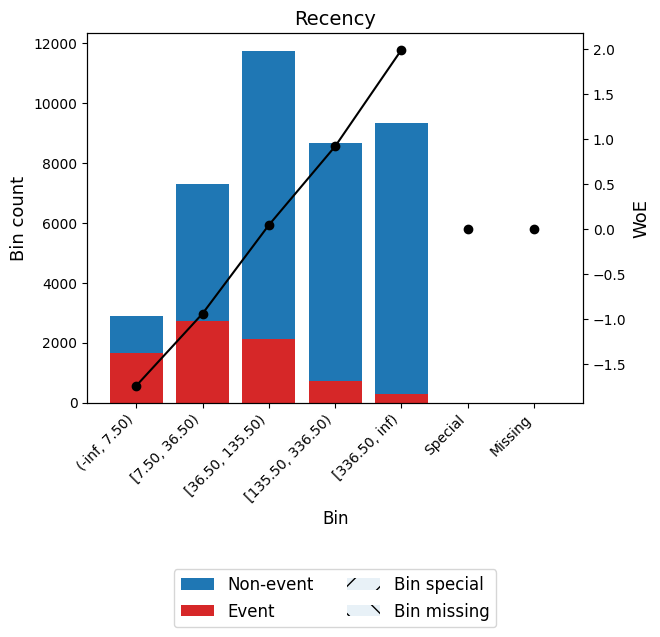

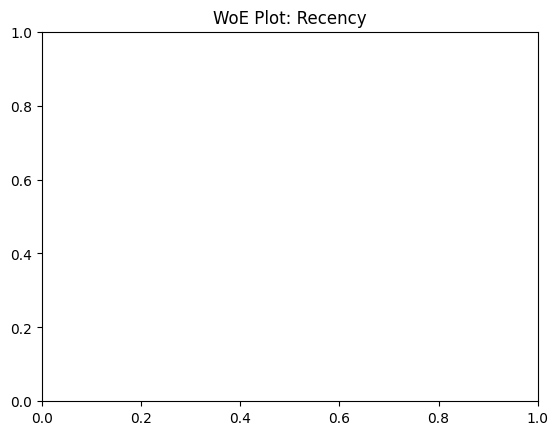


--- Анализ переменной: Frequency ---
                  Bin  Count  Event rate       WoE        IV
0        (-inf, 1.50)  12308    0.063780  1.228058  0.309086
1        [1.50, 3.50)  10216    0.118637  0.547038  0.064103
2        [3.50, 7.50)   8431    0.210651 -0.137354  0.004157
3       [7.50, 17.50)   6188    0.352456 -0.850099  0.140976
4        [17.50, inf)   2763    0.570756 -1.743297  0.301186
5             Special      0    0.000000       0.0  0.000000
6             Missing      0    0.000000       0.0  0.000000
Totals                 39906    0.188718            0.819507
Total IV: 0.8195
📉 График для Frequency:


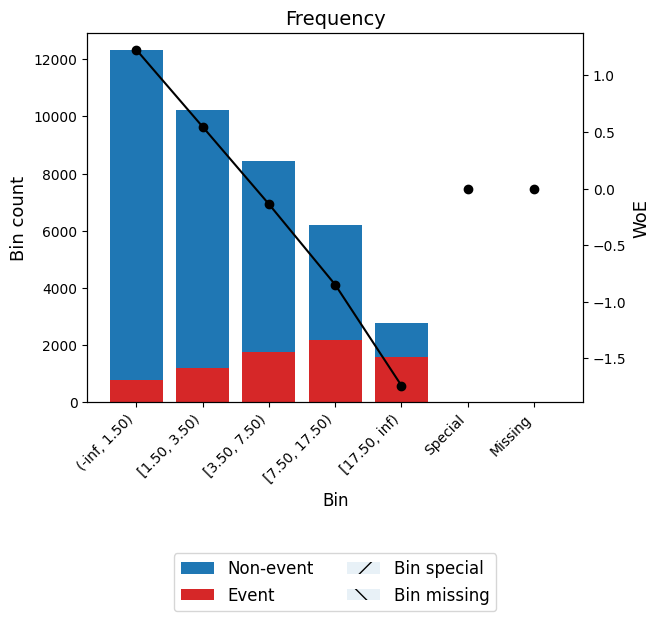

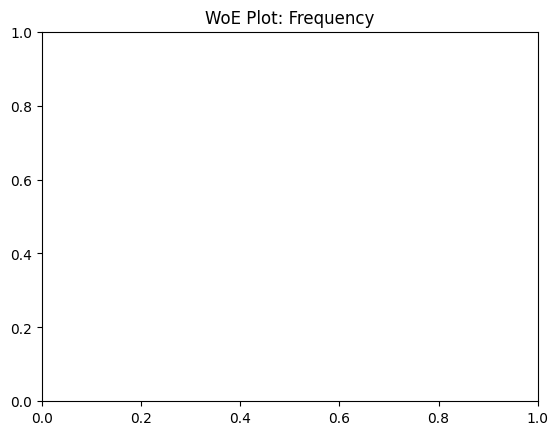


--- Анализ переменной: weekend_visits ---
                 Bin  Count  Event rate       WoE        IV
0       (-inf, 0.50)  13749    0.093607  0.812011  0.173797
1       [0.50, 1.50)  11869    0.132614   0.41968  0.045741
2       [1.50, 3.50)   8299    0.236053 -0.283914  0.018254
3       [3.50, 6.50)   3810    0.385564 -0.992362  0.121814
4        [6.50, inf)   2179    0.569986 -1.740154  0.236620
5            Special      0    0.000000       0.0  0.000000
6            Missing      0    0.000000       0.0  0.000000
Totals                39906    0.188718            0.596226
Total IV: 0.5962
📉 График для weekend_visits:


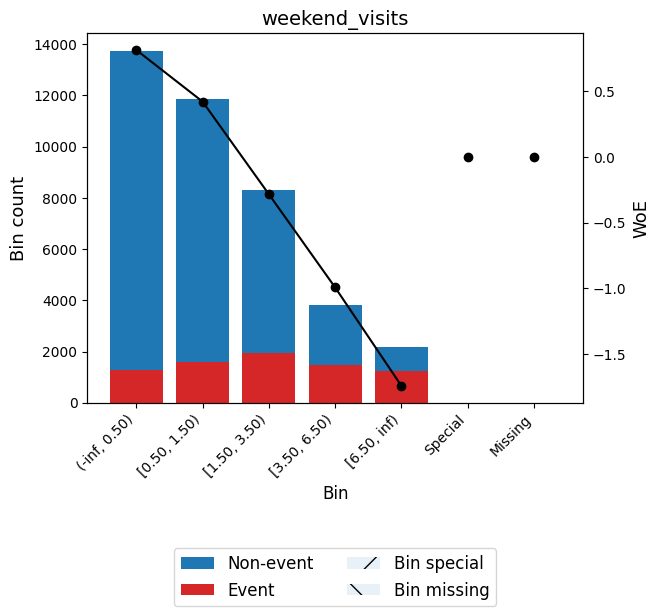

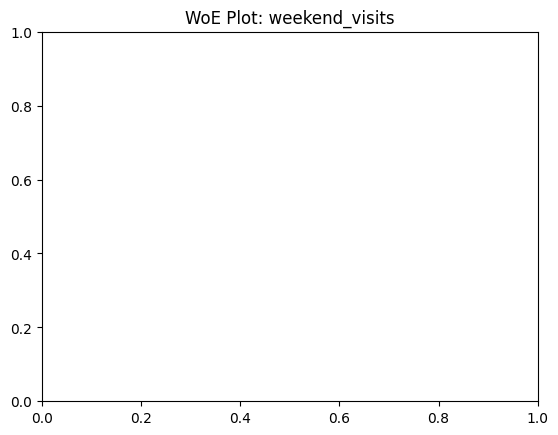


--- Анализ переменной: total_unique_items ---
                   Bin  Count  Event rate       WoE        IV
0         (-inf, 5.50)  13253    0.078246  1.008056  0.241561
1        [5.50, 10.50)   6982    0.126182  0.476792  0.034074
2       [10.50, 26.50)  10072    0.201648 -0.082334  0.001755
3       [26.50, 66.50)   7169    0.324592 -0.725611  0.115684
4         [66.50, inf)   2430    0.516461 -1.524226  0.198685
5              Special      0    0.000000       0.0  0.000000
6              Missing      0    0.000000       0.0  0.000000
Totals                  39906    0.188718            0.591758
Total IV: 0.5918
📉 График для total_unique_items:


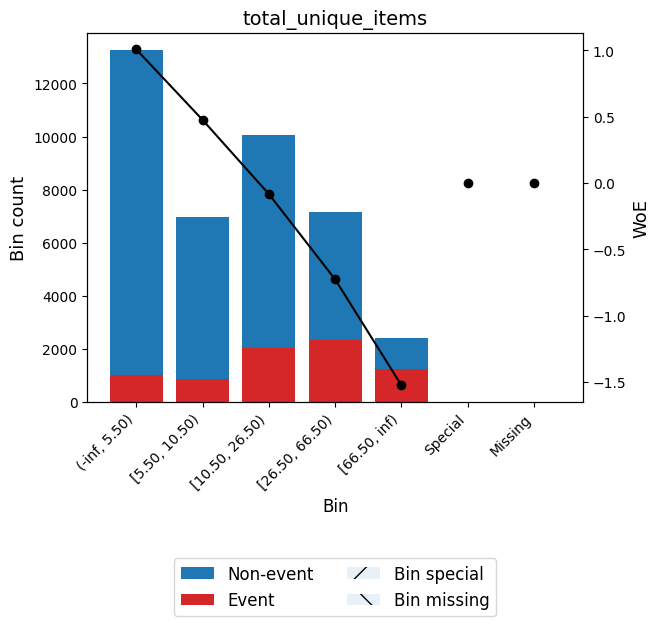

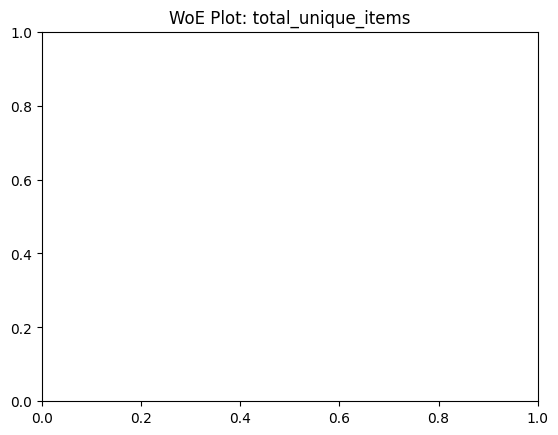


--- Анализ переменной: total_quantity ---
                    Bin  Count  Event rate       WoE        IV
0          (-inf, 8.50)  12006    0.077545  1.017828  0.222357
1         [8.50, 24.50)   9977    0.130901  0.434656  0.041037
2        [24.50, 70.50)  10012    0.220835 -0.197552  0.010397
3       [70.50, 160.50)   5240    0.331870  -0.75862  0.093138
4         [160.50, inf)   2671    0.503182 -1.471088  0.202236
5               Special      0    0.000000       0.0  0.000000
6               Missing      0    0.000000       0.0  0.000000
Totals                   39906    0.188718            0.569166
Total IV: 0.5692
📉 График для total_quantity:


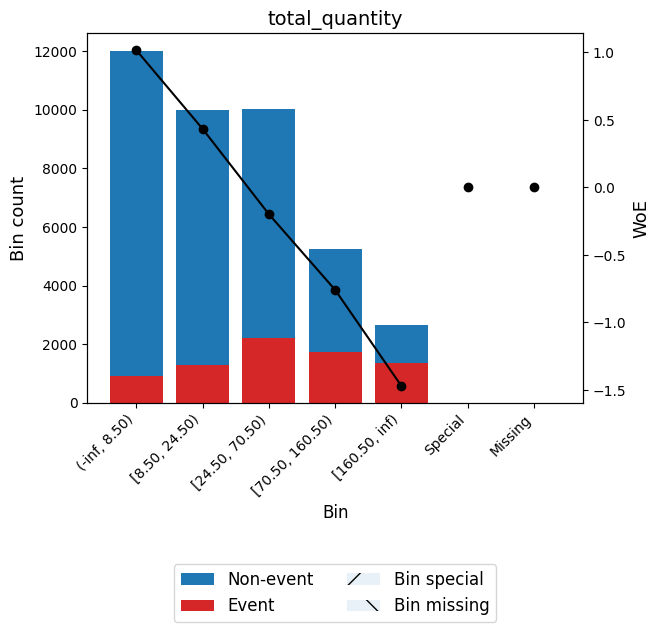

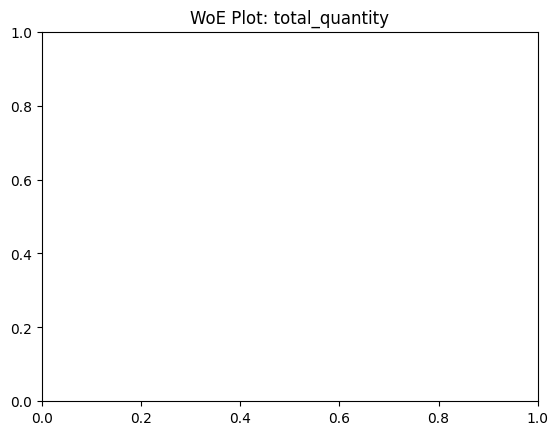


🔄 Трансформация выборок в WoE значения...

💾 Сохранение результатов...
✅ Готово!
Размер train_woe: (39906, 12)
Размер test_woe: (41196, 12)

📦 Сериализация модели (Task 2)...


NameError: name 'vars_to_transform' is not defined

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from optbinning import OptimalBinning
import warnings

# 屏蔽一些不必要的警告
warnings.filterwarnings('ignore')

# ==========================================
# 1. ЗАГРУЗКА ДАННЫХ
# ==========================================
print("📥 Загрузка данных...")
train_df = pd.read_csv('train_sample.csv')
test_df = pd.read_csv('test_sample.csv')

# Определяем колонки
target_col = 'event'
id_col = 'client'
exclude_cols = [target_col, id_col]
variable_names = [col for col in train_df.columns if col not in exclude_cols]

# Подготовка данных (принудительное приведение типов)
X_train = train_df[variable_names].astype(float)
y_train = train_df[target_col].astype(int)
X_test = test_df[variable_names].astype(float)

print(f"✅ Данные загружены. Переменных для анализа: {len(variable_names)}")

# ==========================================
# 2. ПОСТРОЕНИЕ БИННИНГА (ЦИКЛ ПО ПЕРЕМЕННЫМ)
# ==========================================
print("\n⚙️ Запуск OptimalBinning для каждой переменной...")

binning_results = {}  # Словарь для хранения обученных объектов
iv_list = []          # Список для хранения IV

# Цикл по каждой переменной
for var in variable_names:
    try:
        # Создаем объект OptimalBinning
        # ИЗМЕНЕНИЕ: max_n_bins=5 для снижения переобучения и IV
        optb = OptimalBinning(
            name=var,
            dtype="numerical",
            solver="cp", 
            monotonic_trend="auto_asc_desc", 
            min_bin_size=0.05,  # Минимальный размер бина 5%
            max_n_bins=5        # Максимум 5 бинов (как на слайдах)
        )
        
        # Обучаем
        optb.fit(X_train[var], y_train)
        
        # Проверяем статус
        if optb.status == "OPTIMAL":
            binning_results[var] = optb
            
            # Получаем таблицу биннинга
            binning_table = optb.binning_table.build()
            
            # ИЗВЛЕЧЕНИЕ IV: Берем значение из строки Totals или максимум, чтобы получить общий IV
            # Обычно в таблице есть строка "Totals", где IV - это сумма
            iv_value = binning_table['IV'].max() 
            
            iv_list.append({'name': var, 'iv': iv_value})
        else:
            print(f"⚠️ Переменная {var}: статус {optb.status}, пропускаем.")
            
    except Exception as e:
        print(f"❌ Ошибка при обработке {var}: {e}")

# ==========================================
# 3. АНАЛИЗ IV (Information Value)
# ==========================================
print("\n📊 Анализ Information Value (IV):")

# Создаем DataFrame с IV и сортируем
iv_df = pd.DataFrame(iv_list).sort_values('iv', ascending=False).reset_index(drop=True)

# Сохраняем таблицу IV для следующего шага (корреляции)
iv_df.to_csv('iv_table.csv', index=False)
print("💾 Таблица IV сохранена в 'iv_table.csv' (нужна для этапа корреляции).")

# Фильтруем слабые признаки (IV < 0.02)
selected_features_df = iv_df[iv_df['iv'] >= 0.02]
print(selected_features_df)

if selected_features_df.empty:
    top_5_vars = iv_df['name'].head(5).tolist()
else:
    top_5_vars = selected_features_df['name'].head(5).tolist()

# ==========================================
# 4 & 5. ВЫВОД ТАБЛИЦ И ГРАФИКОВ (ТОП-5)
# ==========================================
print(f"\n🏆 Топ-5 признаков для детального анализа: {top_5_vars}")

for var in top_5_vars:
    print(f"\n--- Анализ переменной: {var} ---")
    optb = binning_results[var]
    
    # 4. Таблица WoE
    bt = optb.binning_table.build()
    # Убираем строку Totals для красивого вывода, если она есть
    bt_view = bt[bt['Bin'] != 'Totals'] if 'Totals' in bt['Bin'].values else bt
    print(bt[['Bin', 'Count', 'Event rate', 'WoE', 'IV']])
    print(f"Total IV: {optb.binning_table.iv:.4f}") # Точный вывод IV
    
    # 5. График WoE
    print(f"📉 График для {var}:")
    optb.binning_table.plot(metric="woe", show_bin_labels=True)
    plt.title(f"WoE Plot: {var}")
    plt.show()

# ==========================================
# 6. ТРАНСФОРМАЦИЯ В WoE
# ==========================================
print("\n🔄 Трансформация выборок в WoE значения...")

# Создаем пустые DataFrame
train_woe_transformed = pd.DataFrame(index=X_train.index)
test_woe_transformed = pd.DataFrame(index=X_test.index)

# Берем список успешных переменных
vars_to_use = [v for v in variable_names if v in binning_results]

for var in vars_to_use:
    optb = binning_results[var]
    # metric="woe" -> значения
    train_woe_transformed[var] = optb.transform(X_train[var], metric="woe")
    test_woe_transformed[var] = optb.transform(X_test[var], metric="woe")

# Добавляем ID и Target
final_train_woe = pd.concat([train_df[[id_col, target_col]], train_woe_transformed], axis=1)
final_test_woe = pd.concat([test_df[[id_col, target_col]], test_woe_transformed], axis=1)

# ==========================================
# 7. СОХРАНЕНИЕ
# ==========================================
print("\n💾 Сохранение результатов...")
final_train_woe.to_csv('train_woe.csv', index=False)
final_test_woe.to_csv('test_woe.csv', index=False)

print(f"✅ Готово!")
print(f"Размер train_woe: {final_train_woe.shape}")
print(f"Размер test_woe: {final_test_woe.shape}")

# ... (前面所有的代码保持不变，直到第7步保存CSV结束)

# ==========================================
# 8. СОХРАНЕНИЕ И ЗАГРУЗКА МОДЕЛИ (PICKLE)
# ==========================================
import pickle

print("\n📦 Сериализация модели (Task 2)...")

# Поскольку мы использовали цикл вместо BinningProcess, нам нужно сохранить:
# 1. Словарь с обученными объектами (binning_results)
# 2. Список переменных, которые мы выбрали для трансформации (vars_to_transform)
model_data = {
    'binning_results': binning_results,
    'selected_variables': vars_to_transform
}

# 1. Сохранение модели (pickle.dump)
# "wb" означает "write binary" - запись в двоичном формате
filename = "binning_model.pkl"
with open(filename, "wb") as f:
    pickle.dump(model_data, f)
    
print(f"✅ Модель успешно сохранена в файл '{filename}'")

# ---------------------------------------------------------

# 2. Загрузка модели (pickle.load) для демонстрации
# "rb" означает "read binary" - чтение в двоичном формате
print("\n📤 Демонстрация загрузки модели...")

with open(filename, "rb") as f:
    loaded_model_data = pickle.load(f)

# Извлекаем компоненты
loaded_results = loaded_model_data['binning_results']
loaded_vars = loaded_model_data['selected_variables']

# 3. Пример использования загруженной модели на новых данных (X_test)
print("🔄 Применение загруженной модели к тестовым данным...")
X_new_example = X_test.copy() # Симулируем новые данные
X_new_woe_transformed = pd.DataFrame(index=X_new_example.index)

for var in loaded_vars:
    if var in loaded_results:
        # Используем сохраненный объект OptimalBinning
        optb = loaded_results[var]
        X_new_woe_transformed[var] = optb.transform(X_new_example[var], metric="woe")

print("✅ Трансформация новых данных с помощью загруженной модели прошла успешно!")
print(X_new_woe_transformed.head())

# ==========================================
# ОТВЕТЫ НА ВОПРОСЫ (ТЕОРИЯ)
# ==========================================
"""
Ответы на вопросы задания:

1. Что делает pickle.dump()?
   pickle.dump(obj, file) — эта функция сериализует объект Python (превращает его в поток байтов) 
   и записывает его в указанный файл. Это позволяет сохранить состояние объекта (например, обученной модели) на диск.

2. Что делает pickle.load()?
   pickle.load(file) — эта функция читает поток байтов из файла и десериализует его 
   (восстанавливает) обратно в исходный объект Python. Это используется для загрузки ранее сохраненной модели.

3. Для чего нужны режимы "wb" и "rb"?
   - "wb" (write binary): Режим записи в двоичном формате. Pickle работает с байтами, а не с текстом, 
     поэтому важно указывать 'b' (binary), чтобы файл открылся для записи байтов.
   - "rb" (read binary): Режим чтения в двоичном формате. Необходим для корректного чтения 
     сериализованных байтовых данных из файла.
"""

Описание этапа:
1.Построить матрицу корреляций для всех WoE-трансформированных признаков.
2.Визуализировать матрицу с помощью тепловой карты (heatmap).
3.Автоматически найти пары признаков с высокой корреляцией (∣corr∣>0.7).
4.Для каждой такой пары сравнить Information Value (IV) и исключить признак с меньшим IV.
5.Сформировать итоговые наборы данных (train_woe_selected), готовые к обучению модели.

📥 Загрузка данных (только Train)...
✅ Файл train_woe.csv загружен. Размер: (39906, 12)
Признаков для анализа корреляции: 10

📊 Построение матрицы корреляций...


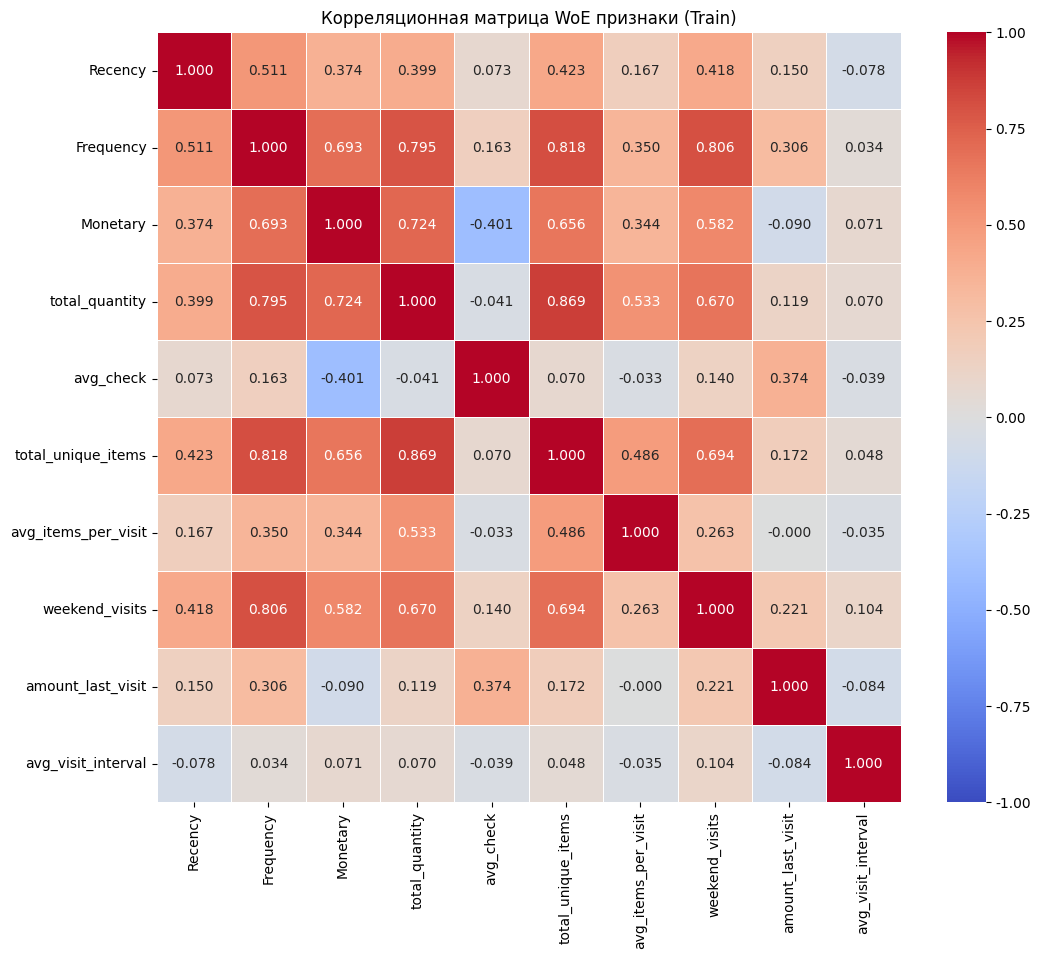


🔍 Поиск коррелирующих признаков (> 0.7)...
Найдено пар с высокой корреляцией: 5
⚠️ Таблица IV не найдена в памяти. Будет использоваться IV=0 (удаление условное).
   Пара: Frequency <-> total_quantity (Corr: 0.795)
      IV(Frequency)=0.0000, IV(total_quantity)=0.0000
      -> Удаляем total_quantity (IV меньше)
   Пара: Frequency <-> total_unique_items (Corr: 0.818)
      IV(Frequency)=0.0000, IV(total_unique_items)=0.0000
      -> Удаляем total_unique_items (IV меньше)
   Пара: Frequency <-> weekend_visits (Corr: 0.806)
      IV(Frequency)=0.0000, IV(weekend_visits)=0.0000
      -> Удаляем weekend_visits (IV меньше)
   Пара: Monetary <-> total_quantity (Corr: 0.724)
      IV(Monetary)=0.0000, IV(total_quantity)=0.0000
      -> Удаляем total_quantity (IV меньше)
   Пара: total_quantity <-> total_unique_items (Corr: 0.869)
      IV(total_quantity)=0.0000, IV(total_unique_items)=0.0000
      -> Удаляем total_unique_items (IV меньше)

🗑️ Итого удалено признаков: 3
Список удаленных: ['tota

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# ==========================================
# 1. ЗАГРУЗКА И ПОДГОТОВКА ДАННЫХ
# ==========================================
print("📥 Загрузка данных (только Train)...")

# Загружаем только обучающую выборку
try:
    train_woe = pd.read_csv("train_woe.csv")
    print(f"✅ Файл train_woe.csv загружен. Размер: {train_woe.shape}")
except FileNotFoundError:
    print("❌ Файл train_woe.csv не найден. Сначала выполните этап биннинга.")
    raise

# Определяем колонки для исключения из матрицы (ID и Target)
# Проверьте, как точно называются ваши колонки в файле
exclude_cols = ['event', 'client', 'target', 'client_id'] 

# Выбираем только числовые колонки для расчета корреляции
features_for_corr = train_woe.select_dtypes(include='number').copy()

# Удаляем служебные колонки из анализа
for col in exclude_cols:
    if col in features_for_corr.columns:
        features_for_corr.drop(columns=col, inplace=True)

print(f"Признаков для анализа корреляции: {features_for_corr.shape[1]}")

# ==========================================
# 2. РАСЧЕТ И ВИЗУАЛИЗАЦИЯ МАТРИЦЫ
# ==========================================
print("\n📊 Построение матрицы корреляций...")

corr_matrix = features_for_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".3f",        # 3 знака после запятой
            cmap='coolwarm', 
            center=0, 
            linewidths=0.5,
            vmin=-1, vmax=1)
plt.title('Корреляционная матрица WoE признаки (Train)')
plt.show()

# ==========================================
# 3. ФИЛЬТРАЦИЯ МУЛЬТИКОЛЛИНЕАРНОСТИ
# ==========================================
print("\n🔍 Поиск коррелирующих признаков (> 0.7)...")

threshold = 0.70
features_to_drop = set()
high_corr_pairs = []

# Проходим по верхнему треугольнику матрицы
cols = corr_matrix.columns
n = len(cols)
for i in range(n):
    for j in range(i+1, n):
        val = corr_matrix.iloc[i, j]
        if abs(val) > threshold:
            high_corr_pairs.append((cols[i], cols[j], val))

print(f"Найдено пар с высокой корреляцией: {len(high_corr_pairs)}")

# --- Подготовка словаря IV ---
# Пытаемся получить IV из предыдущего контекста.
# Если вы запускаете это как отдельный скрипт, IV будет 0, и удаление будет по первому признаку.
# В идеале здесь нужно загрузить сохраненную таблицу IV.
if 'summary_sorted' in locals():
    # Если переменная осталась с прошлого шага
    iv_dict = dict(zip(summary_sorted['name'], summary_sorted['iv']))
    print("✅ Используем IV значения из памяти.")
else:
    print("⚠️ Таблица IV не найдена в памяти. Будет использоваться IV=0 (удаление условное).")
    iv_dict = {}

# --- Сравнение и выбор ---
for col1, col2, corr_val in high_corr_pairs:
    iv1 = iv_dict.get(col1, 0)
    iv2 = iv_dict.get(col2, 0)
    
    print(f"   Пара: {col1} <-> {col2} (Corr: {corr_val:.3f})")
    print(f"      IV({col1})={iv1:.4f}, IV({col2})={iv2:.4f}")
    
    if iv1 >= iv2:
        print(f"      -> Удаляем {col2} (IV меньше)")
        features_to_drop.add(col2)
    else:
        print(f"      -> Удаляем {col1} (IV меньше)")
        features_to_drop.add(col1)

# ==========================================
# 4. СОЗДАНИЕ ИТОГОВОГО ДАТАСЕТА
# ==========================================
features_to_drop_list = list(features_to_drop)

if features_to_drop_list:
    train_woe_selected = train_woe.drop(columns=features_to_drop_list)
    print(f"\n🗑️ Итого удалено признаков: {len(features_to_drop_list)}")
    print(f"Список удаленных: {features_to_drop_list}")
else:
    train_woe_selected = train_woe.copy()
    print("\n✅ Признаков для удаления не найдено.")

print(f"Размер итогового Train: {train_woe_selected.shape}")

# Сохраняем результат
train_woe_selected.to_csv('train_woe_selected.csv', index=False)
print("💾 Файл 'train_woe_selected.csv' успешно сохранен.")

Промпт：
Входные данные:

train_woe_selected.csv (обучающая выборка после отбора признаков).
test_woe.csv (тестовая выборка, нужно оставить в ней только те же колонки, что и в train).
Требования:

Загрузить данные.
Синхронизировать набор колонок в Train и Test (удалить из Test те признаки, которые были удалены из Train на предыдущем шаге).
Обучить логистическую регрессию. Используем библиотеку statsmodels (Logit), так как она дает детальный отчет (summary) с P-values и коэффициентами, что важно для интерпретации.
Сделать предсказание вероятностей для тестовой выборки.
Рассчитать метрики качества:
AUC-ROC
Gini (2 * AUC - 1)
Построить график ROC-кривой.
Вывести коэффициенты модели (интерпретация влияния WoE признаков).

📥 Загрузка данных...
✅ Признаки для модели: ['Recency', 'Frequency', 'Monetary', 'avg_check', 'avg_items_per_visit', 'amount_last_visit', 'avg_visit_interval']

⚙️ Обучение логистической регрессии (sklearn)...

📊 Оценка качества...
🔹 ROC-AUC: 0.8053
🔹 Gini:    0.6106


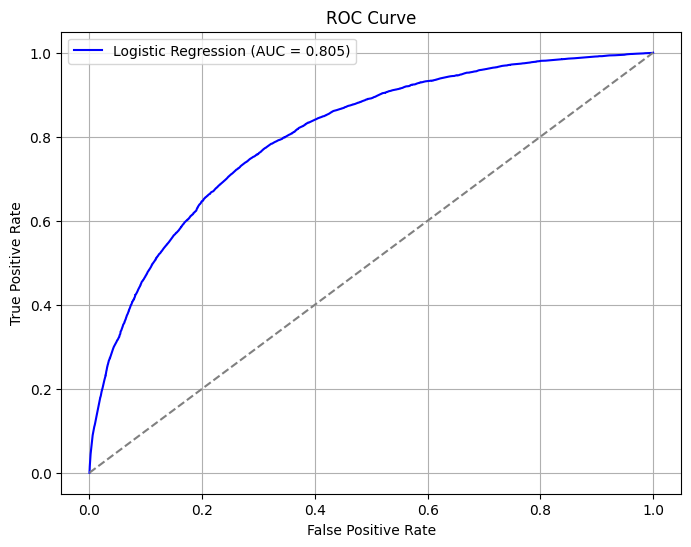


📈 Влияние признаков:
Intercept (смещение): -1.4579
               Feature      Coef
5    amount_last_visit  0.019995
4  avg_items_per_visit -0.104264
2             Monetary -0.231408
1            Frequency -0.429461
3            avg_check -0.758898
6   avg_visit_interval -0.798275
0              Recency -0.800728


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ==========================================
# 1. ЗАГРУЗКА ДАННЫХ
# ==========================================
print("📥 Загрузка данных...")
train_df = pd.read_csv('train_woe_selected.csv')
test_df = pd.read_csv('test_woe.csv')

target_col = 'event'
id_col = 'client'

# ==========================================
# 2. ПОДГОТОВКА ДАННЫХ
# ==========================================
# Определяем признаки (все кроме служебных)
train_features = [col for col in train_df.columns if col not in [target_col, id_col, 'client_id', 'target']]
print(f"✅ Признаки для модели: {train_features}")

X_train = train_df[train_features]
y_train = train_df[target_col]

# Синхронизируем тест
X_test = test_df[train_features]
y_test = test_df[target_col]

# ==========================================
# 3. ОБУЧЕНИЕ (SKLEARN)
# ==========================================
print("\n⚙️ Обучение логистической регрессии (sklearn)...")

# C=1.0 - стандартная регуляризация. solver='liblinear' хорош для небольших датасетов
model = LogisticRegression(C=1.0, solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# ==========================================
# 4. ПРЕДСКАЗАНИЕ И МЕТРИКИ
# ==========================================
print("\n📊 Оценка качества...")

# Предсказываем вероятности (колонка 1 - вероятность класса "1")
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Метрики
auc = roc_auc_score(y_test, y_pred_prob)
gini = 2 * auc - 1

print(f"🔹 ROC-AUC: {auc:.4f}")
print(f"🔹 Gini:    {gini:.4f}")

# ==========================================
# 5. ГРАФИК
# ==========================================
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# ==========================================
# 6. КОЭФФИЦИЕНТЫ
# ==========================================
print("\n📈 Влияние признаков:")
coefs = pd.DataFrame({
    'Feature': train_features,
    'Coef': model.coef_[0]
}).sort_values(by='Coef', ascending=False)

# Добавляем Intercept (смещение)
print(f"Intercept (смещение): {model.intercept_[0]:.4f}")
print(coefs)

Промпт
Задача: Сравнить 4 модели бинарной классификации и выбрать лучшую.

Входные данные:

train_woe_selected.csv (обучающая выборка)
test_woe.csv (тестовая выборка)
Шаги:

Подготовка: Загрузить данные. Определить X_train, y_train, X_test, y_test.
Обучение моделей:
Model 1 (Trivial): LogisticRegression только на признаке 'Recency'.
Model 2 (Full LR): LogisticRegression(penalty='l2', C=1e9, solver='liblinear') — имитация отсутствия регуляризации.
Model 3 (L2 LR): LogisticRegression(penalty='l2', C=1.0, solver='liblinear') — стандартная регуляризация.
Model 4 (XGBoost): XGBClassifier(eval_metric='logloss', use_label_encoder=False). Если xgboost не установлен, установить его.
Оценка: Для каждой модели получить вероятности на тесте (predict_proba) и посчитать ROC-AUC.
Визуализация: Построить график, на котором отображены 4 ROC-кривые. Добавить легенду с AUC каждой модели.
Анализ: Рассчитать ΔAUC = AUC_model - AUC_trivial. Вывести таблицу результатов.
Сохранение: Сохранить модель с самым высоким AUC в файл best_model.pkl с помощью pickle или joblib.

✅ XGBoost найден.

📥 Загрузка данных...
Признаки (7): ['Recency', 'Frequency', 'Monetary', 'avg_check', 'avg_items_per_visit', 'amount_last_visit', 'avg_visit_interval']

⚙️ Обучение моделей...
Тривиальная модель строится на признаке: Recency

📊 Результаты:


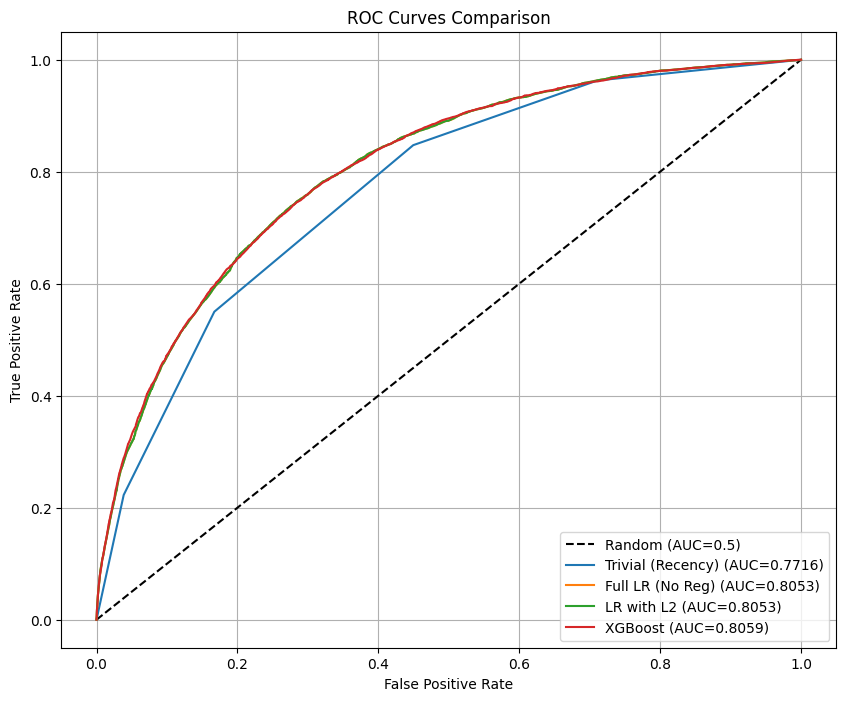

               Model       AUC     Δ AUC
3            XGBoost  0.805938  0.034372
2         LR with L2  0.805312  0.033745
1   Full LR (No Reg)  0.805308  0.033741
0  Trivial (Recency)  0.771567  0.000000

🏆 Лучшая модель: XGBoost
💾 Модель сохранена в 'best_model.pkl'

📝 Краткий вывод:
XGBoost показал лучший результат. Это ожидаемо, так как бустинг умеет находить нелинейные зависимости между признаками, которые линейная регрессия может упустить.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
import subprocess

# --- 0. ПРОВЕРКА И УСТАНОВКА XGBOOST ---
try:
    import xgboost as xgb
    print("✅ XGBoost найден.")
except ImportError:
    print("⚠️ XGBoost не найден. Устанавливаем...")
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'xgboost'])
    import xgboost as xgb
    print("✅ XGBoost установлен.")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# ==========================================
# 1. ЗАГРУЗКА И ПОДГОТОВКА ДАННЫХ
# ==========================================
print("\n📥 Загрузка данных...")
train_df = pd.read_csv('train_woe_selected.csv')
test_df = pd.read_csv('test_woe.csv')

target_col = 'event'
id_col = 'client'

# Определяем список полезных признаков (исключая служебные)
features = [col for col in train_df.columns if col not in [target_col, id_col, 'client_id', 'target']]
print(f"Признаки ({len(features)}): {features}")

# Формируем матрицы
X_train = train_df[features]
y_train = train_df[target_col]
X_test = test_df[features] # Берем те же колонки
y_test = test_df[target_col]

# ==========================================
# 2. ОБУЧЕНИЕ МОДЕЛЕЙ
# ==========================================
print("\n⚙️ Обучение моделей...")

models = {}
predictions = {}

# --- A) Тривиальная модель (только Recency) ---
# Ищем название колонки Recency (оно может быть Recency или Recency_woe и т.д.)
recency_col = [c for c in features if 'Recency' in c][0]
print(f"Тривиальная модель строится на признаке: {recency_col}")

model_trivial = LogisticRegression(solver='liblinear')
model_trivial.fit(X_train[[recency_col]], y_train)
models['Trivial (Recency)'] = model_trivial
# Предсказываем (нужен 2D массив для одного признака)
predictions['Trivial (Recency)'] = model_trivial.predict_proba(X_test[[recency_col]])[:, 1]


# --- B) Полная ЛогРегрессия (Почти без регуляризации) ---
# C=1e9 (очень большое число) отключает регуляризацию
model_full = LogisticRegression(penalty='l2', C=1e9, solver='liblinear', random_state=42)
model_full.fit(X_train, y_train)
models['Full LR (No Reg)'] = model_full
predictions['Full LR (No Reg)'] = model_full.predict_proba(X_test)[:, 1]


# --- C) ЛогРегрессия с L2 (Стандартная) ---
# C=1.0 - стандартное значение
model_l2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
model_l2.fit(X_train, y_train)
models['LR with L2'] = model_l2
predictions['LR with L2'] = model_l2.predict_proba(X_test)[:, 1]


# --- D) XGBoost ---
model_xgb = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
model_xgb.fit(X_train, y_train)
models['XGBoost'] = model_xgb
predictions['XGBoost'] = model_xgb.predict_proba(X_test)[:, 1]

# ==========================================
# 3. СРАВНЕНИЕ И ВИЗУАЛИЗАЦИЯ
# ==========================================
print("\n📊 Результаты:")

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC=0.5)')

results_table = []
auc_scores = {}

# Считаем AUC для тривиальной модели отдельно, чтобы вычитать его
auc_trivial = roc_auc_score(y_test, predictions['Trivial (Recency)'])

for name, preds in predictions.items():
    auc = roc_auc_score(y_test, preds)
    auc_scores[name] = auc
    
    # Расчет дельты
    delta_auc = auc - auc_trivial
    
    # Добавляем в таблицу
    results_table.append({
        'Model': name,
        'AUC': auc,
        'Δ AUC': delta_auc if name != 'Trivial (Recency)' else 0.0
    })
    
    # Рисуем кривую
    fpr, tpr, _ = roc_curve(y_test, preds)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.4f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Вывод таблицы результатов
results_df = pd.DataFrame(results_table).sort_values(by='AUC', ascending=False)
print(results_df)

# ==========================================
# 4. СОХРАНЕНИЕ ЛУЧШЕЙ МОДЕЛИ
# ==========================================
best_model_name = results_df.iloc[0]['Model']
best_model_obj = models[best_model_name]

print(f"\n🏆 Лучшая модель: {best_model_name}")
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model_obj, f)

print(f"💾 Модель сохранена в 'best_model.pkl'")

# Краткий вывод (автоматический)
print("\n📝 Краткий вывод:")
if best_model_name == 'XGBoost':
    print("XGBoost показал лучший результат. Это ожидаемо, так как бустинг умеет находить нелинейные зависимости между признаками, которые линейная регрессия может упустить.")
elif 'L2' in best_model_name:
    print("Регуляризованная логистическая регрессия показала лучший результат. Это говорит о том, что данные хорошо разделяются линейно, а регуляризация помогла убрать шум.")
else:
    print(f"Модель {best_model_name} оказалась лучшей.")

Промпт Прогроз Ноябрь
1.Используем существующую функцию calculate_client_profile_at_date для расчета профилей на 2019-11-01 (история до 2019-11-01).
2.Напишем функцию mark_events для разметки событий в период [2019-11-01, 2019-12-01).
3.Напишем функцию create_training_sample для объединения профилей и событий.
4.Вызовем все функции по порядку.

In [16]:
import pandas as pd
import numpy as np

# =========================================================
# 1. РАСЧЕТ ПРОФИЛЯ (ПО ИСТОРИИ)
# =========================================================
def calculate_client_profile_at_date(visits_df, observation_end_date):
    """
    Создает профиль клиента на дату observation_end_date.
    Использует данные СТРОГО ДО этой даты.
    """
    obs_date = pd.to_datetime(observation_end_date)
    
    # Фильтрация истории (строго до даты среза)
    df_hist = visits_df[visits_df['visit_date'] < obs_date].copy()
    
    if df_hist.empty:
        print("⚠️ Нет истории покупок до указанной даты.")
        return pd.DataFrame()

    print(f"1️⃣ Расчет профилей на дату: {observation_end_date}")
    print(f"   - Строк истории: {len(df_hist)}")

    # Вспомогательные колонки
    df_hist['is_weekend'] = df_hist['visit_date'].dt.weekday.isin([5, 6]).astype(int)

    # --- АГРЕГАЦИЯ ---
    profiles = df_hist.groupby('client').agg(
        last_visit_date=('visit_date', 'max'),
        first_visit_date=('visit_date', 'min'),
        Frequency=('visit_date', 'nunique'),
        Monetary=('amount', 'sum'),
        total_quantity=('quantity', 'sum'),
        total_unique_items=('item', 'nunique'),
    )

    # Weekend visits
    unique_dates = df_hist[['client', 'visit_date', 'is_weekend']].drop_duplicates()
    weekend_counts = unique_dates.groupby('client')['is_weekend'].sum().rename('weekend_visits')
    profiles = profiles.join(weekend_counts)

    # Amount Last Visit (правильный расчет)
    last_dates = profiles[['last_visit_date']].reset_index()
    last_visit_transactions = pd.merge(df_hist, last_dates, 
                                     left_on=['client', 'visit_date'], 
                                     right_on=['client', 'last_visit_date'])
    amount_last = last_visit_transactions.groupby('client')['amount'].sum().rename('amount_last_visit')
    profiles = profiles.join(amount_last)

    # --- ПРИЗНАКИ ---
    profiles['Recency'] = (obs_date - profiles['last_visit_date']).dt.days
    profiles['avg_check'] = (profiles['Monetary'] / profiles['Frequency']).round(2)
    profiles['avg_items_per_visit'] = (profiles['total_quantity'] / profiles['Frequency']).round(2)
    profiles['tenure'] = (obs_date - profiles['first_visit_date']).dt.days

    # Удаляем nan, если вдруг Frequency=0 (не должно быть, но на всякий случай)
    profiles = profiles.fillna(0)

    return profiles.reset_index()


# =========================================================
# 2. РАЗМЕТКА СОБЫТИЙ (БУДУЩЕЕ)
# =========================================================
def mark_events(visits_df, result_start_date, result_end_date):
    """
    Определяет, посещал ли клиент магазин в диапазоне [start, end).
    Возвращает DataFrame: client, event (1/0).
    """
    start_dt = pd.to_datetime(result_start_date)
    end_dt = pd.to_datetime(result_end_date)
    
    print(f"2️⃣ Разметка событий в период: {result_start_date} — {result_end_date}")
    
    # 1. Получаем список ВСЕХ уникальных клиентов из исходного датафрейма
    # (чтобы тем, кто не пришел, поставить 0)
    all_clients = pd.DataFrame(visits_df['client'].unique(), columns=['client'])
    
    # 2. Фильтруем визиты в целевом периоде
    mask_target = (visits_df['visit_date'] >= start_dt) & (visits_df['visit_date'] < end_dt)
    target_visits = visits_df[mask_target]
    
    # Список клиентов, которые вернулись (target = 1)
    returned_clients = target_visits['client'].unique()
    
    # 3. Разметка: 1 если есть в returned_clients, иначе 0
    all_clients['event'] = all_clients['client'].isin(returned_clients).astype(int)
    
    print(f"   - Всего клиентов в базе: {len(all_clients)}")
    print(f"   - Вернулись (Event=1): {len(returned_clients)}")
    
    return all_clients


# =========================================================
# 3. ОБЪЕДИНЕНИЕ В ОБУЧАЮЩУЮ ВЫБОРКУ
# =========================================================
def create_training_sample(profile_df, events_df):
    """
    Соединяет профили и события. Удаляет лишние колонки с датами.
    """
    print(f"3️⃣ Объединение выборок...")
    
    # 1. Inner Join (оставляем только тех, для кого есть и профиль, и инфо о событии)
    train_df = pd.merge(profile_df, events_df, on='client', how='inner')
    
    # 2. Проверка на пропуски в event
    if train_df['event'].isna().any():
        print("⚠️ ВНИМАНИЕ: Есть пропуски в целевой переменной!")
    
    # 3. Удаление служебных колонок с датами (модели их не переваривают)
    cols_to_drop = ['last_visit_date', 'first_visit_date']
    # Проверяем, есть ли они в датафрейме перед удалением
    cols_to_drop = [c for c in cols_to_drop if c in train_df.columns]
    
    train_df = train_df.drop(columns=cols_to_drop)
    
    # 4. Проверка баланса классов
    class_counts = train_df['event'].value_counts()
    print("   - Баланс классов:")
    print(class_counts)
    
    print(f"✅ Готовая выборка: {train_df.shape}")
    return train_df


# =========================================================
# БЛОК ЗАПУСКА
# =========================================================

# Предполагаем, что df_daily_items уже загружен в память
if 'df_daily_items' in locals():
    
    # --- НАСТРОЙКА ДАТ (Согласно вашему заданию) ---
    CUTOFF_DATE = '2019-11-01'      # Дата расчета профилей
    PREDICT_START = '2019-11-01'    # Начало периода предсказания
    PREDICT_END = '2019-12-01'      # Конец периода предсказания
    
    # 1. Считаем профили (История до 01.11)
    profiles = calculate_client_profile_at_date(df_daily_items, CUTOFF_DATE)
    
    # 2. Размечаем события (Будущее с 01.11 по 01.12)
    events = mark_events(df_daily_items, PREDICT_START, PREDICT_END)
    
    # 3. Собираем всё вместе
    if not profiles.empty and not events.empty:
        train_sample = create_training_sample(profiles, events)
        
        print("\n👇 ПРИМЕР ИТОГОВОЙ ВЫБОРКИ:")
        print(train_sample.head())
        
        # Можно сохранить для модели
        # train_sample.to_csv('train_set_20191101.csv', index=False)
    else:
        print("❌ Ошибка: пустые профили или события.")
else:
    print("❌ Переменная df_daily_items не найдена. Загрузите данные.")

1️⃣ Расчет профилей на дату: 2019-11-01
   - Строк истории: 1008688
2️⃣ Разметка событий в период: 2019-11-01 — 2019-12-01
   - Всего клиентов в базе: 42746
   - Вернулись (Event=1): 0
3️⃣ Объединение выборок...
   - Баланс классов:
event
0    42746
Name: count, dtype: int64
✅ Готовая выборка: (42746, 12)

👇 ПРИМЕР ИТОГОВОЙ ВЫБОРКИ:
        client  Frequency  Monetary  total_quantity  total_unique_items  \
0      client1          1      2273               9                   4   
1     client10          1      4757               3                   3   
2    client100          3      8063               7                   6   
3   client1000         16     44853             309                  40   
4  client10000          1      8495               5                   5   

   weekend_visits  amount_last_visit  Recency  avg_check  avg_items_per_visit  \
0               0               2273      648    2273.00                 9.00   
1               0               4757       88    475